In [6]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from __future__ import print_function
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist

In [37]:
imdb = pd.read_csv(r"C:/Users/cheriexu/Downloads/imdb_imputed_byRF_for_cluster_with_response_whole_imdb.csv")
imdb.head(5)

,Unnamed: 0,X,certificates_R,certificates_PG,art.direction_1,assistant.director_1,cinematographer_1,costume.department_1,costume.designer_1,countries_1,...,Drama,Action,Documentary,Musical,History,Family,Fantasy,Game-Show,Sport,Biography
0,1,100.0,1,0,0.413003,0.000264,0.000147,0.000015,0.000469,0.085824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,10001.0,0,1,0.000147,0.000103,0.000044,0.000059,0.000015,0.014358,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3,10002.0,1,0,0.000015,0.000440,0.000499,0.000411,0.000733,0.085824,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,10003.0,0,1,0.000235,0.000293,0.000557,0.000044,0.000601,0.448347,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,10004.0,1,0,0.000029,0.000015,0.000367,0.000044,0.000411,0.448347,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [42]:
imdb_cluster = pd.read_csv(r"C:/Users/cheriexu/Downloads/imdb_cluster.csv")
imdb_cluster = imdb_cluster.ix[:,0:27]
imdb_cluster.head(5)

,certificates_PG,art.direction_1,assistant.director_1,cinematographer_1,costume.department_1,costume.designer_1,countries_1,director_1,distributors_1,editor_1,...,production.manager_1,sound.crew_1,writer_1,special.effects.companies_1,cast_1,cast_2,cast_3,cast_4,runtimes_avg,rating
0,0.314320,1.556030,0.009033,0.043184,0.000061,0.003074,0.283954,0.631518,0.007119,0.070267,...,0.001123,0.143364,0.208896,0.001065,0.635144,0.347277,0.025226,0.072059,1.039747,1.330052
1,0.183476,0.000553,0.003513,0.012955,0.000243,0.000096,0.047504,0.189455,0.063058,0.003904,...,0.000749,0.076257,0.104448,1.132333,0.190543,0.057880,0.025226,0.014412,0.833630,0.811007
2,0.314320,0.000055,0.015056,0.146825,0.001702,0.004803,0.283954,1.073580,0.011188,0.113209,...,0.001498,0.146414,0.313344,0.002214,0.952715,0.115759,0.227030,0.072059,0.952720,1.200290
3,0.183476,0.000884,0.010037,0.164099,0.000182,0.003939,1.483381,1.010429,1.258099,0.074171,...,0.000187,0.115911,0.243712,0.000043,1.524344,0.578795,0.151353,0.028824,1.062649,1.005649
4,0.314320,0.000111,0.000502,0.107960,0.000182,0.002690,1.483381,0.694670,0.659053,0.089786,...,0.000562,0.061006,1.880064,0.000149,0.762172,0.463036,0.252256,0.245001,1.200061,0.859667


In [27]:
#--------  keansvar
# A function to compute percentage of variance explained by k-clusters from k-means
# Input:
#      df (A data frame includes information need to be clustered by k-means)
#      n (The maximum number of k we would like to try)

def kmeansvar(df, n):
    kMeansVar = [KMeans(n_clusters=k).fit(df.values) for k in range(1, n)]
    centroids = [X.cluster_centers_ for X in kMeansVar]
    #calculate the Eucludean distance from each point to each cluster center
    k_euclid = [cdist(df.values, cent) for cent in centroids]
    dist = [np.min(ke, axis=1) for ke in k_euclid]
    #total within-cluster sum of squares
    wcss = [sum(d**2) for d in dist]
    #total sum of square
    tss = sum(pdist(df.values)**2)/df.values.shape[0]
    #the between-cluster sum of squares
    bss = tss - wcss
    between = bss/tss*100
    plt.plot(1-between)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Total within-clusters sum of squares')
    plt.show()

In [55]:
clusters=range(2,20)
meandist=[]
# loop through each cluster and fit the model to the data set
# generate the predicted cluster assingment and append the mean distance my taking the sum divided by the shape
for k in clusters:
    model=KMeans(n_clusters=k, n_jobs = -1)
    model.fit(imdb_cluster)
    clusassign=model.predict(imdb_cluster)
    meandist.append(sum(np.min(cdist(imdb_cluster, model.cluster_centers_, 'euclidean'), axis=1))
    / imdb_cluster.shape[0])
    


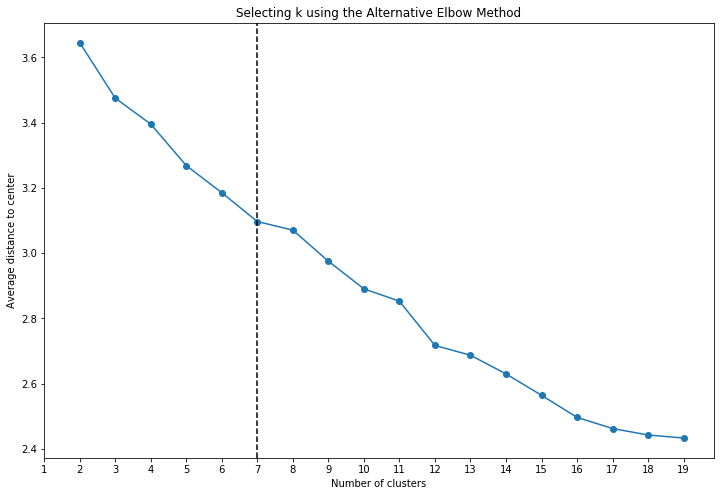

In [58]:
plt.figure(figsize=(12,8))
plt.plot(clusters, meandist, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Average distance to center')
plt.title('Selecting k using the Alternative Elbow Method')
plt.axvline(7, color='k', linestyle='--')
plt.xticks(np.arange(1,20, 1.0))
plt.show()